# Outliers 

## example of outlier test using modified Thompson technique


In [5]:
%pylab inline
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.color']='r'
mpl.rcParams['figure.figsize']=(12,8)
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']=20

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.lines.Line2D at 0x1041232d0>],
 (0, 11),
 <matplotlib.text.Text at 0x10d41bc90>)

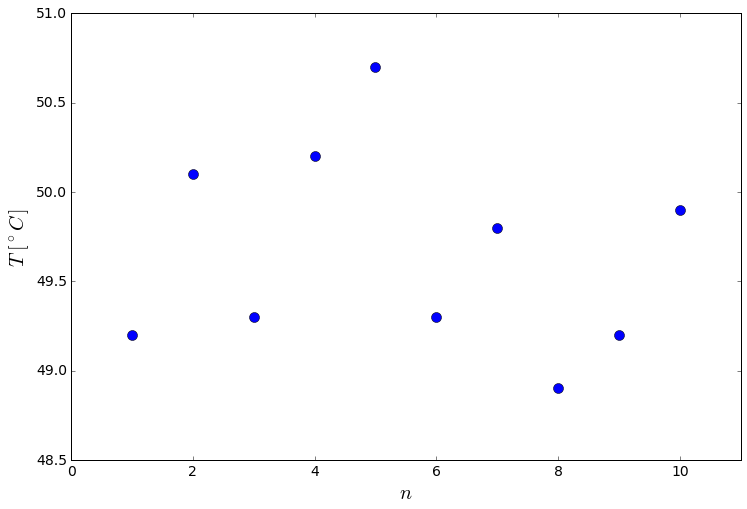

In [6]:
x = array([49.2,50.1,49.3,50.2, 50.7,49.3,49.8,48.9,49.2,49.9])
plot(arange(1,11),x,'o',markersize=10),xlim([0,11]),xlabel('$n$'),ylabel('$T\; [^\circ C \,]$')

## Is there an outlier? 
### Sort, look at the lowest and largest and plot to visualize 

In [7]:
# Sort
x.sort()
print x

[ 48.9  49.2  49.2  49.3  49.3  49.8  49.9  50.1  50.2  50.7]


(<matplotlib.text.Text at 0x10d39fdd0>, <matplotlib.text.Text at 0x10d9bd110>)

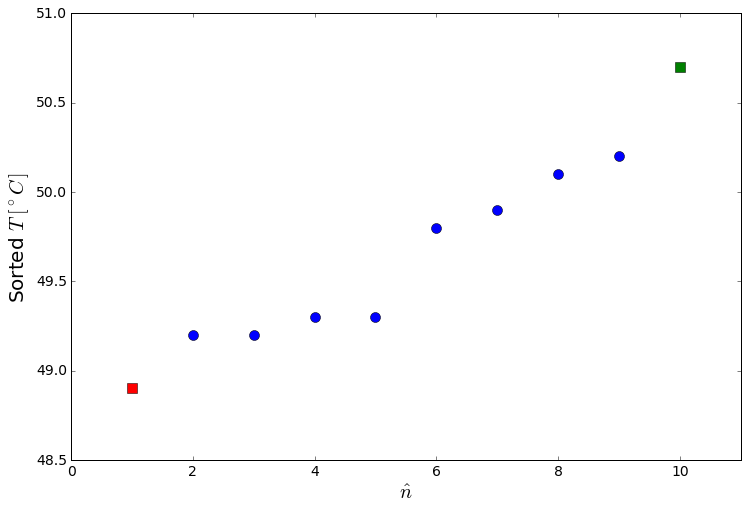

In [8]:
plot(arange(2,10),x[1:-1],'o',markersize=10), plot(1,x[0],'rs',markersize=10,linewidth=2),plot(10,x[-1],'gs',markersize=10)
xlim([0,11])
xlabel('$\hat{n}$'),ylabel('Sorted $T\; [^\circ C \,]$')

### The sample mean and standard deviation, $\bar{x}$, $S_x$

In [9]:
meanx = mean(x)
stdx = std(x,ddof=1)
print 'mean = %6.2f,  std = %6.2f' % (meanx,stdx)

mean =  49.66,  std =   0.57


### Defivations for each suspicious point, take the largest $\delta_i = |x_i - \bar{x}|$

In [10]:
delta = abs(x - meanx)
print 'suspicious points are first and last:'
print '%4.3f %4.3f' % (delta[0],delta[-1])
print 'suspicious point is:',  argmax(delta), 'deviation is = %4.3f' % max(delta)

suspicious points are first and last:
0.760 1.040
suspicious point is: 9 deviation is = 1.040


## Modified Thompson technique, $\tau$

Define the confidence level (95%), therefore $\alpha = 5\%$. Because we deal with outliers, the DOF is smaller:

$$ \tau = \frac{t_{\alpha/2} (n-1)}{\sqrt{n} \sqrt{n-2+t_{\alpha/2}^2}}, \qquad \alpha = 0.05, \quad df = n - 2 $$

if: 

$$\delta_i  > \tau S$$ 

then the point is an **outlier**

remove it, estimate **new** $\bar{x}, S, \delta_i$ and **repeat** the test. until there is no outlier in the set.

In [11]:
from scipy.stats import t


n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(sqrt(n)*sqrt(n-2+tv**2))

print 'n = %d, t = %6.4f, tau = %6.4f' % (n,tv,tau)

print 'compare: %6.3f vs. %6.3f ' % (max(delta), tau*stdx)
print max(delta) > tau*stdx 


n = 10, t = 2.3060, tau = 1.7984
compare:  1.040 vs.  1.022 
True


### So we remove the outlier and repeat the test (from the beginning)

In [12]:
# new data is one point less
xnew = x[:-1].copy()
meanx = mean(xnew)
stdx = std(xnew,ddof=1)
print xnew
print 'mean = %6.2f,  std = %6.2f' % (meanx,stdx)

# new deviations
delta = abs(xnew - meanx)
print delta
print 'suspicious point is:',  argmax(delta), 'its deviation is =', max(delta)

# new \tau test
n = len(xnew)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(sqrt(n)*sqrt(n-2+tv**2))

print 'n = %d, t = %6.4f, tau = %6.4f' % (n,tv,tau)

print 'compare: %6.3f vs. %6.3f ' % (max(delta), tau*stdx)
print max(delta) > tau*stdx 

[ 48.9  49.2  49.2  49.3  49.3  49.8  49.9  50.1  50.2]
mean =  49.54,  std =   0.46
[ 0.64444444  0.34444444  0.34444444  0.24444444  0.24444444  0.25555556
  0.35555556  0.55555556  0.65555556]
suspicious point is: 8 its deviation is = 0.655555555556
n = 9, t = 2.3646, tau = 1.7770
compare:  0.656 vs.  0.820 
False


(<matplotlib.text.Text at 0x1134f4b50>, <matplotlib.text.Text at 0x113b0f5d0>)

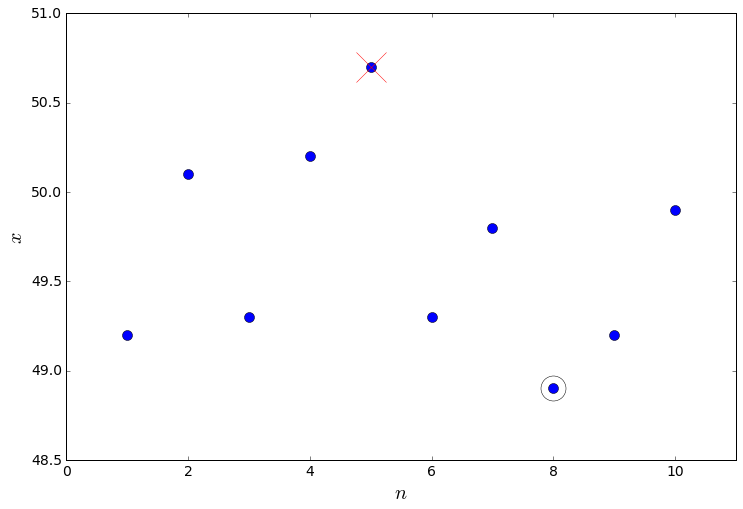

In [30]:
x = array([49.2,50.1,49.3,50.2, 50.7,49.3,49.8,48.9,49.2,49.9])
plot(arange(1,11),x,'o',markersize=10), plot(5,x[4],'rx',markersize=30), plot(8,x[7],'go',markersize=25,mfc='none')
xlim([0,11])
xlabel('$n$'),ylabel('$x$')

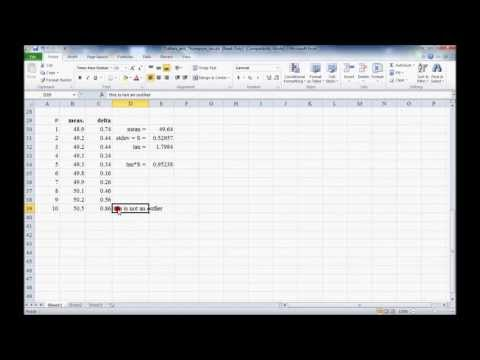

In [1]:
# if you want to do it in Excel, you're welcome to see Prof. Cimbala youtube video
from IPython.display import YouTubeVideo
YouTubeVideo('vJq65t7rsBE')